# Homework 6 

Student: Justin Yu

Student Number: 1006747111

In [39]:
# import packages
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

## Part 1: Univariate Bayesian Linear Regression Analysis

The data set we will be using is called 'Red Wine Quality' found using this link: [https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). The dataset contains information on red and white variants of the Portuguese "Vinho Verde" wine conducted in a study by Cortez et al., 2009.

Since we are conducting an Univariate Bayesian Logistic Regression analysis, we would need to acquire one predictior variable (in this case we choose the ph level of a wine being tasted "pH"), along with a binary outcome variable (in this case we choose the binary outcome variable to be the quality score given to a wine "quality").

In [74]:
# Loading the Data and Selecting our X variable
data = pd.read_csv("winequality-red.csv")
data = data.dropna()
X = data[["pH"]]
X.describe()

,pH
count,1599.000000
mean,3.311113
std,0.154386
min,2.740000
25%,3.210000
50%,3.310000
75%,3.400000
max,4.010000


In [75]:
# convert the Quality Variable into a Binary Variable of 1 for Wines that were ranked greater than or equal to 6
# and 0 for wines ranked less than 6
data["Y"] = np.where(data['quality'] >= 6, 1, 0)
Y = data[["Y"]]

We choose our priors to follow those of a normal distribution with mean zero and sigma = 5 for the intercept $\beta_0$ and sigma = 1 for $\beta$.

In [79]:
with pm.Model() as LR:
    beta_0 = pm.Normal('beta_0', mu=0, sigma=5)
    beta = pm.Normal('beta', mu=0, sigma=1)
    p = pm.Deterministic('p', pm.math.invlogit(pm.math.dot(X, beta) + beta_0)) # logit
    y = pm.Bernoulli('y', p=p, observed=Y)

with LR:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


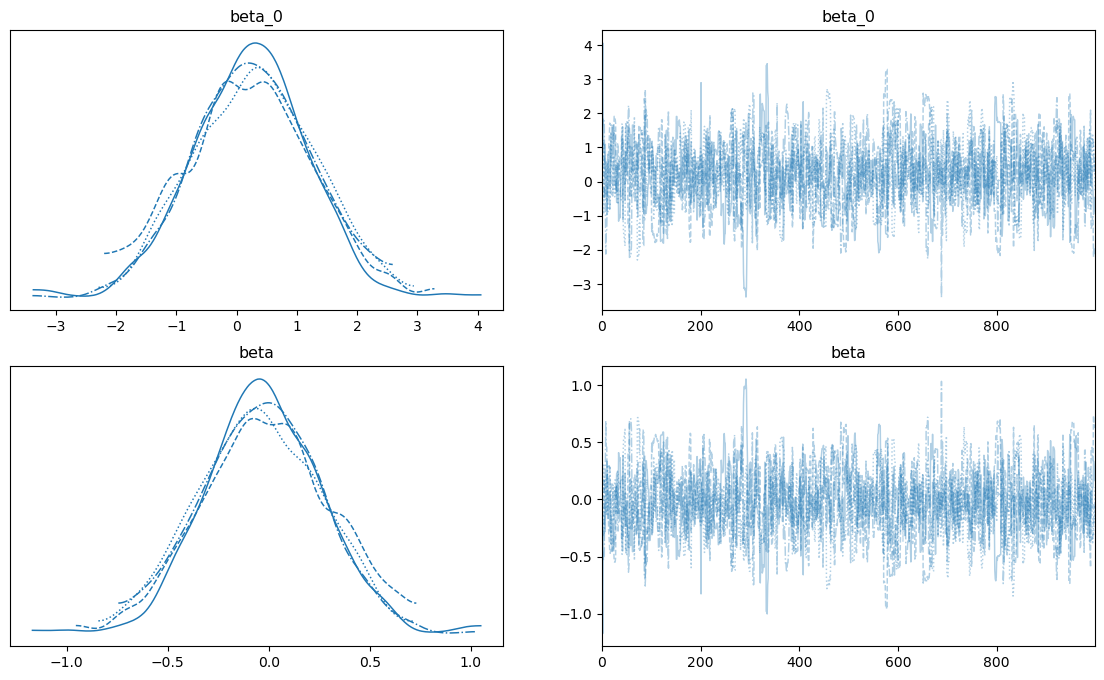

In [80]:
# Generating Trace Plots
fig,ax = plt.subplots(2, 2, figsize=(14,8))
az.plot_trace(idata, var_names=["beta_0", "beta"], axes=ax);

In [81]:
az.summary(idata, round_to=2, var_names= ["beta_0", "beta"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,0.24,0.99,-1.60,2.08,0.04,0.03,790.39,778.93,1.0
beta,-0.03,0.30,-0.57,0.54,0.01,0.01,787.48,777.04,1.0


The Split R Hat shows good similar convergence between the 4 chains.

# Part 2: Penalized Bayesian Regression

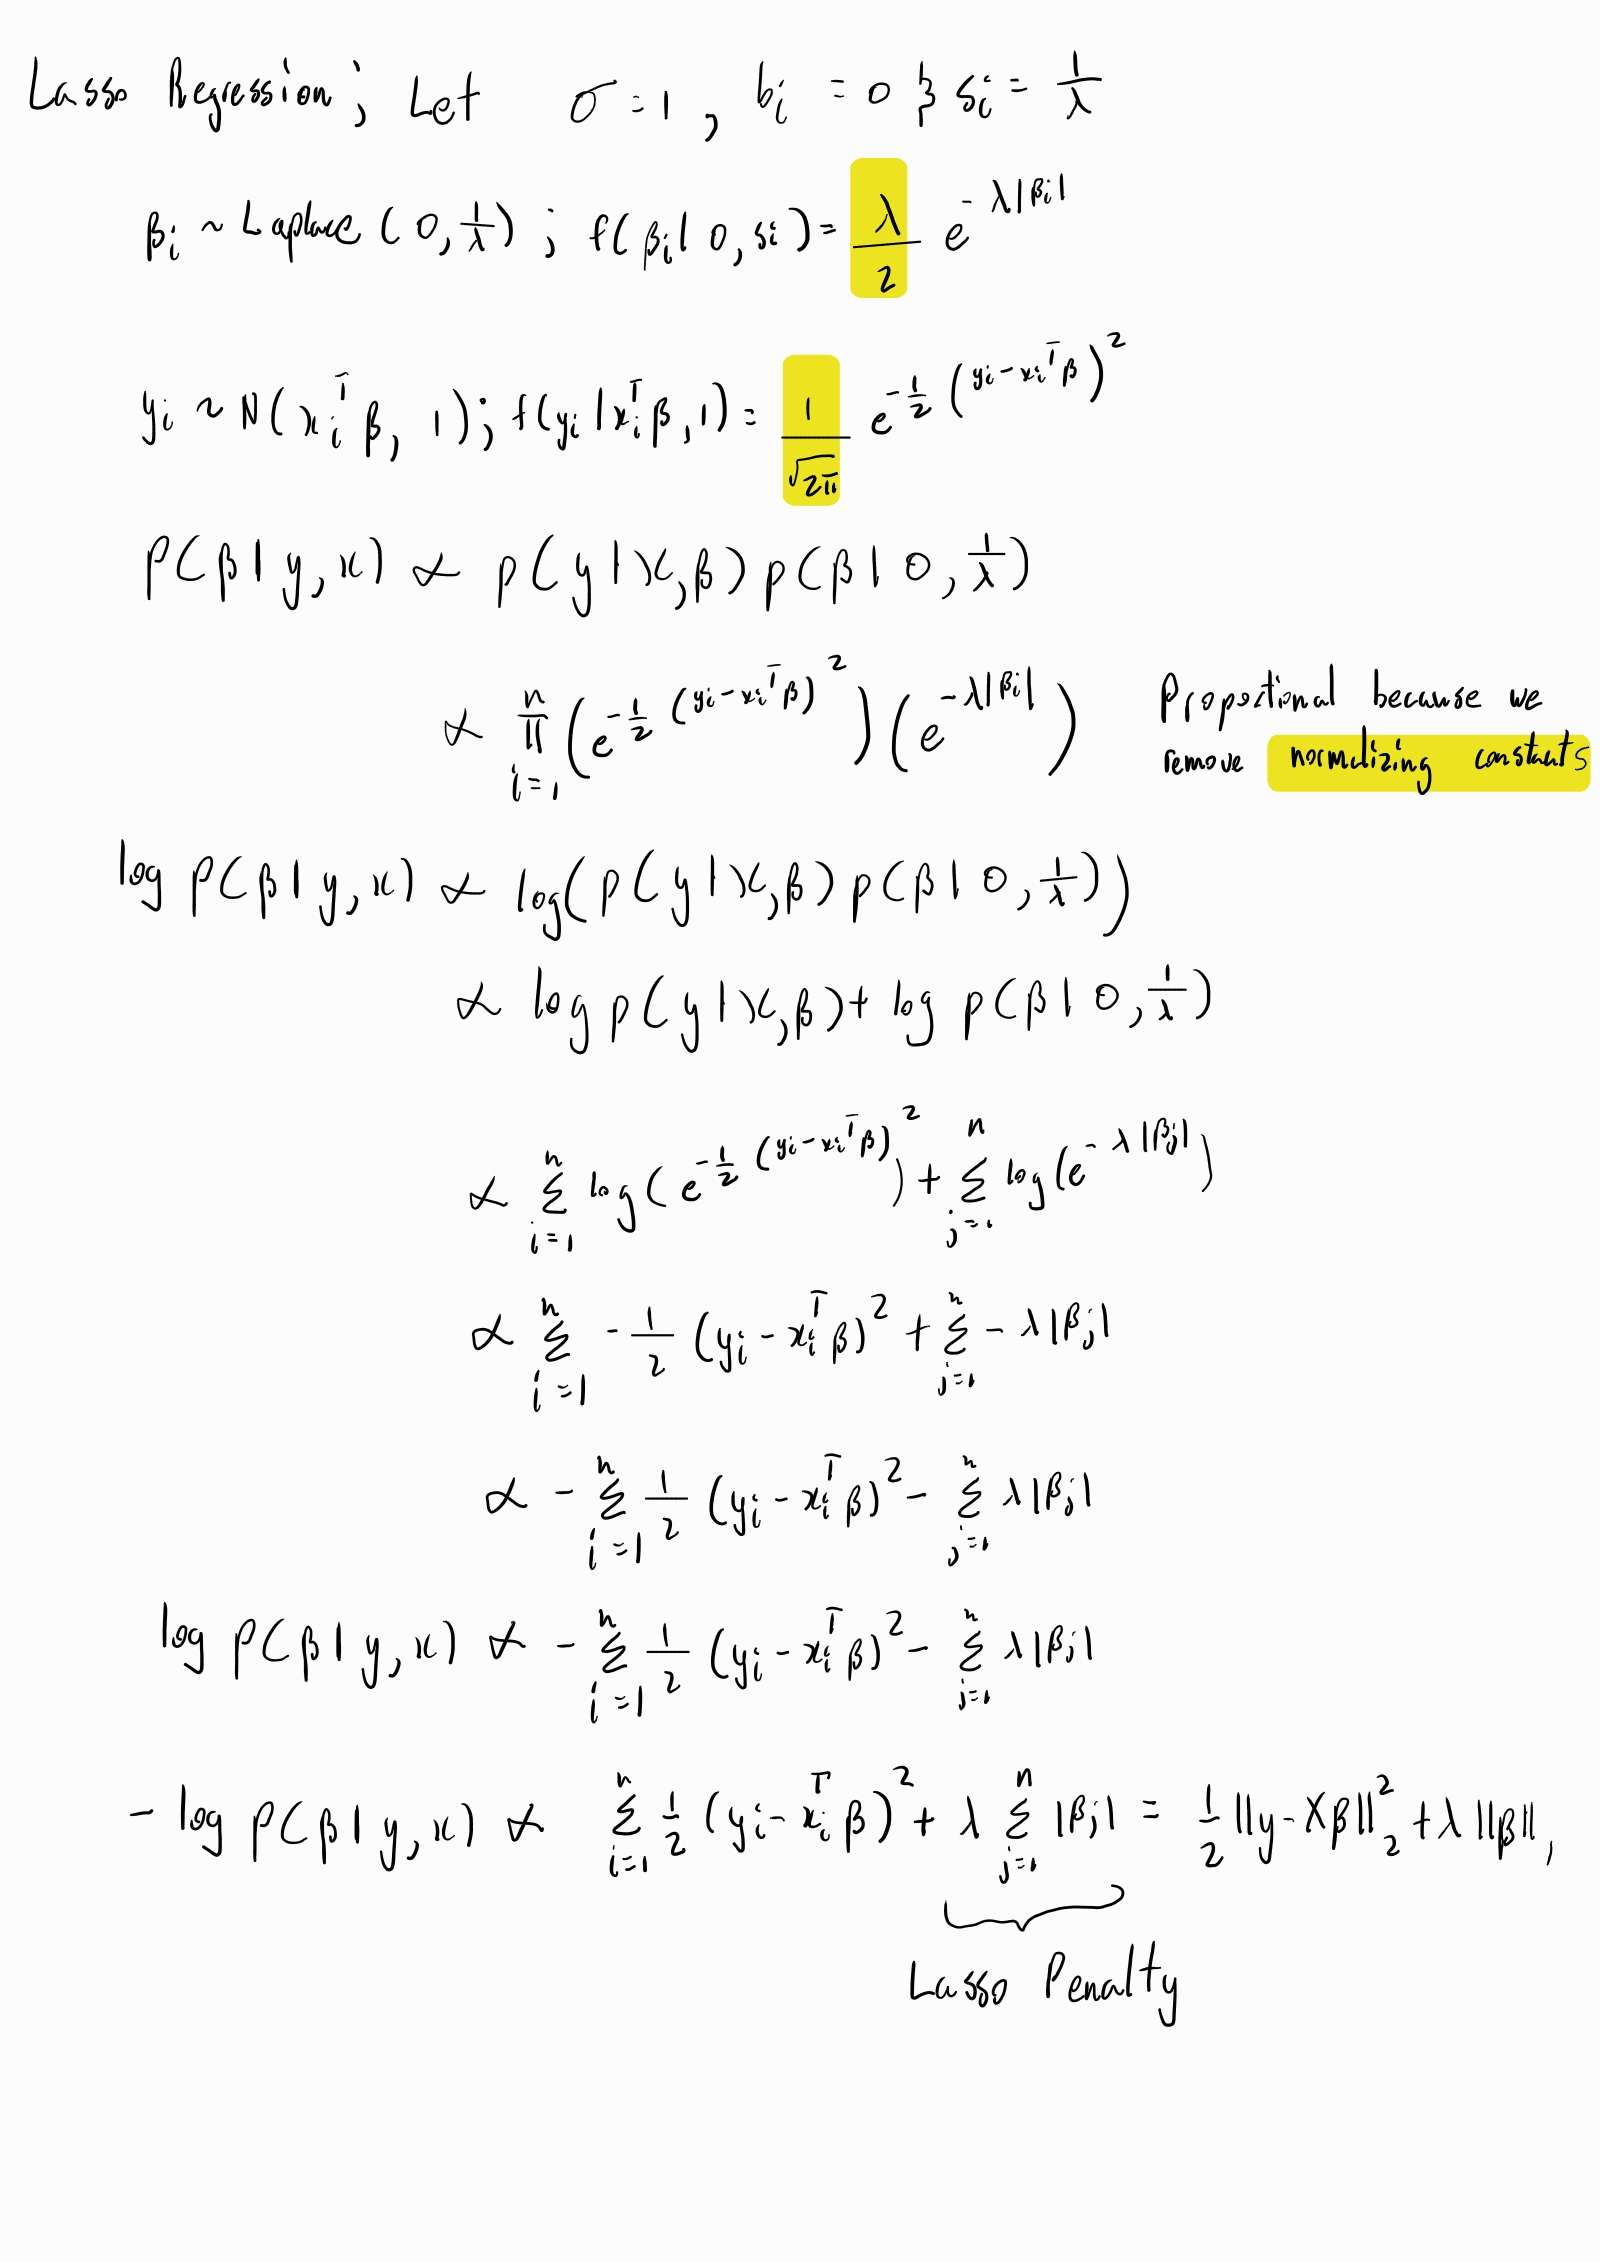

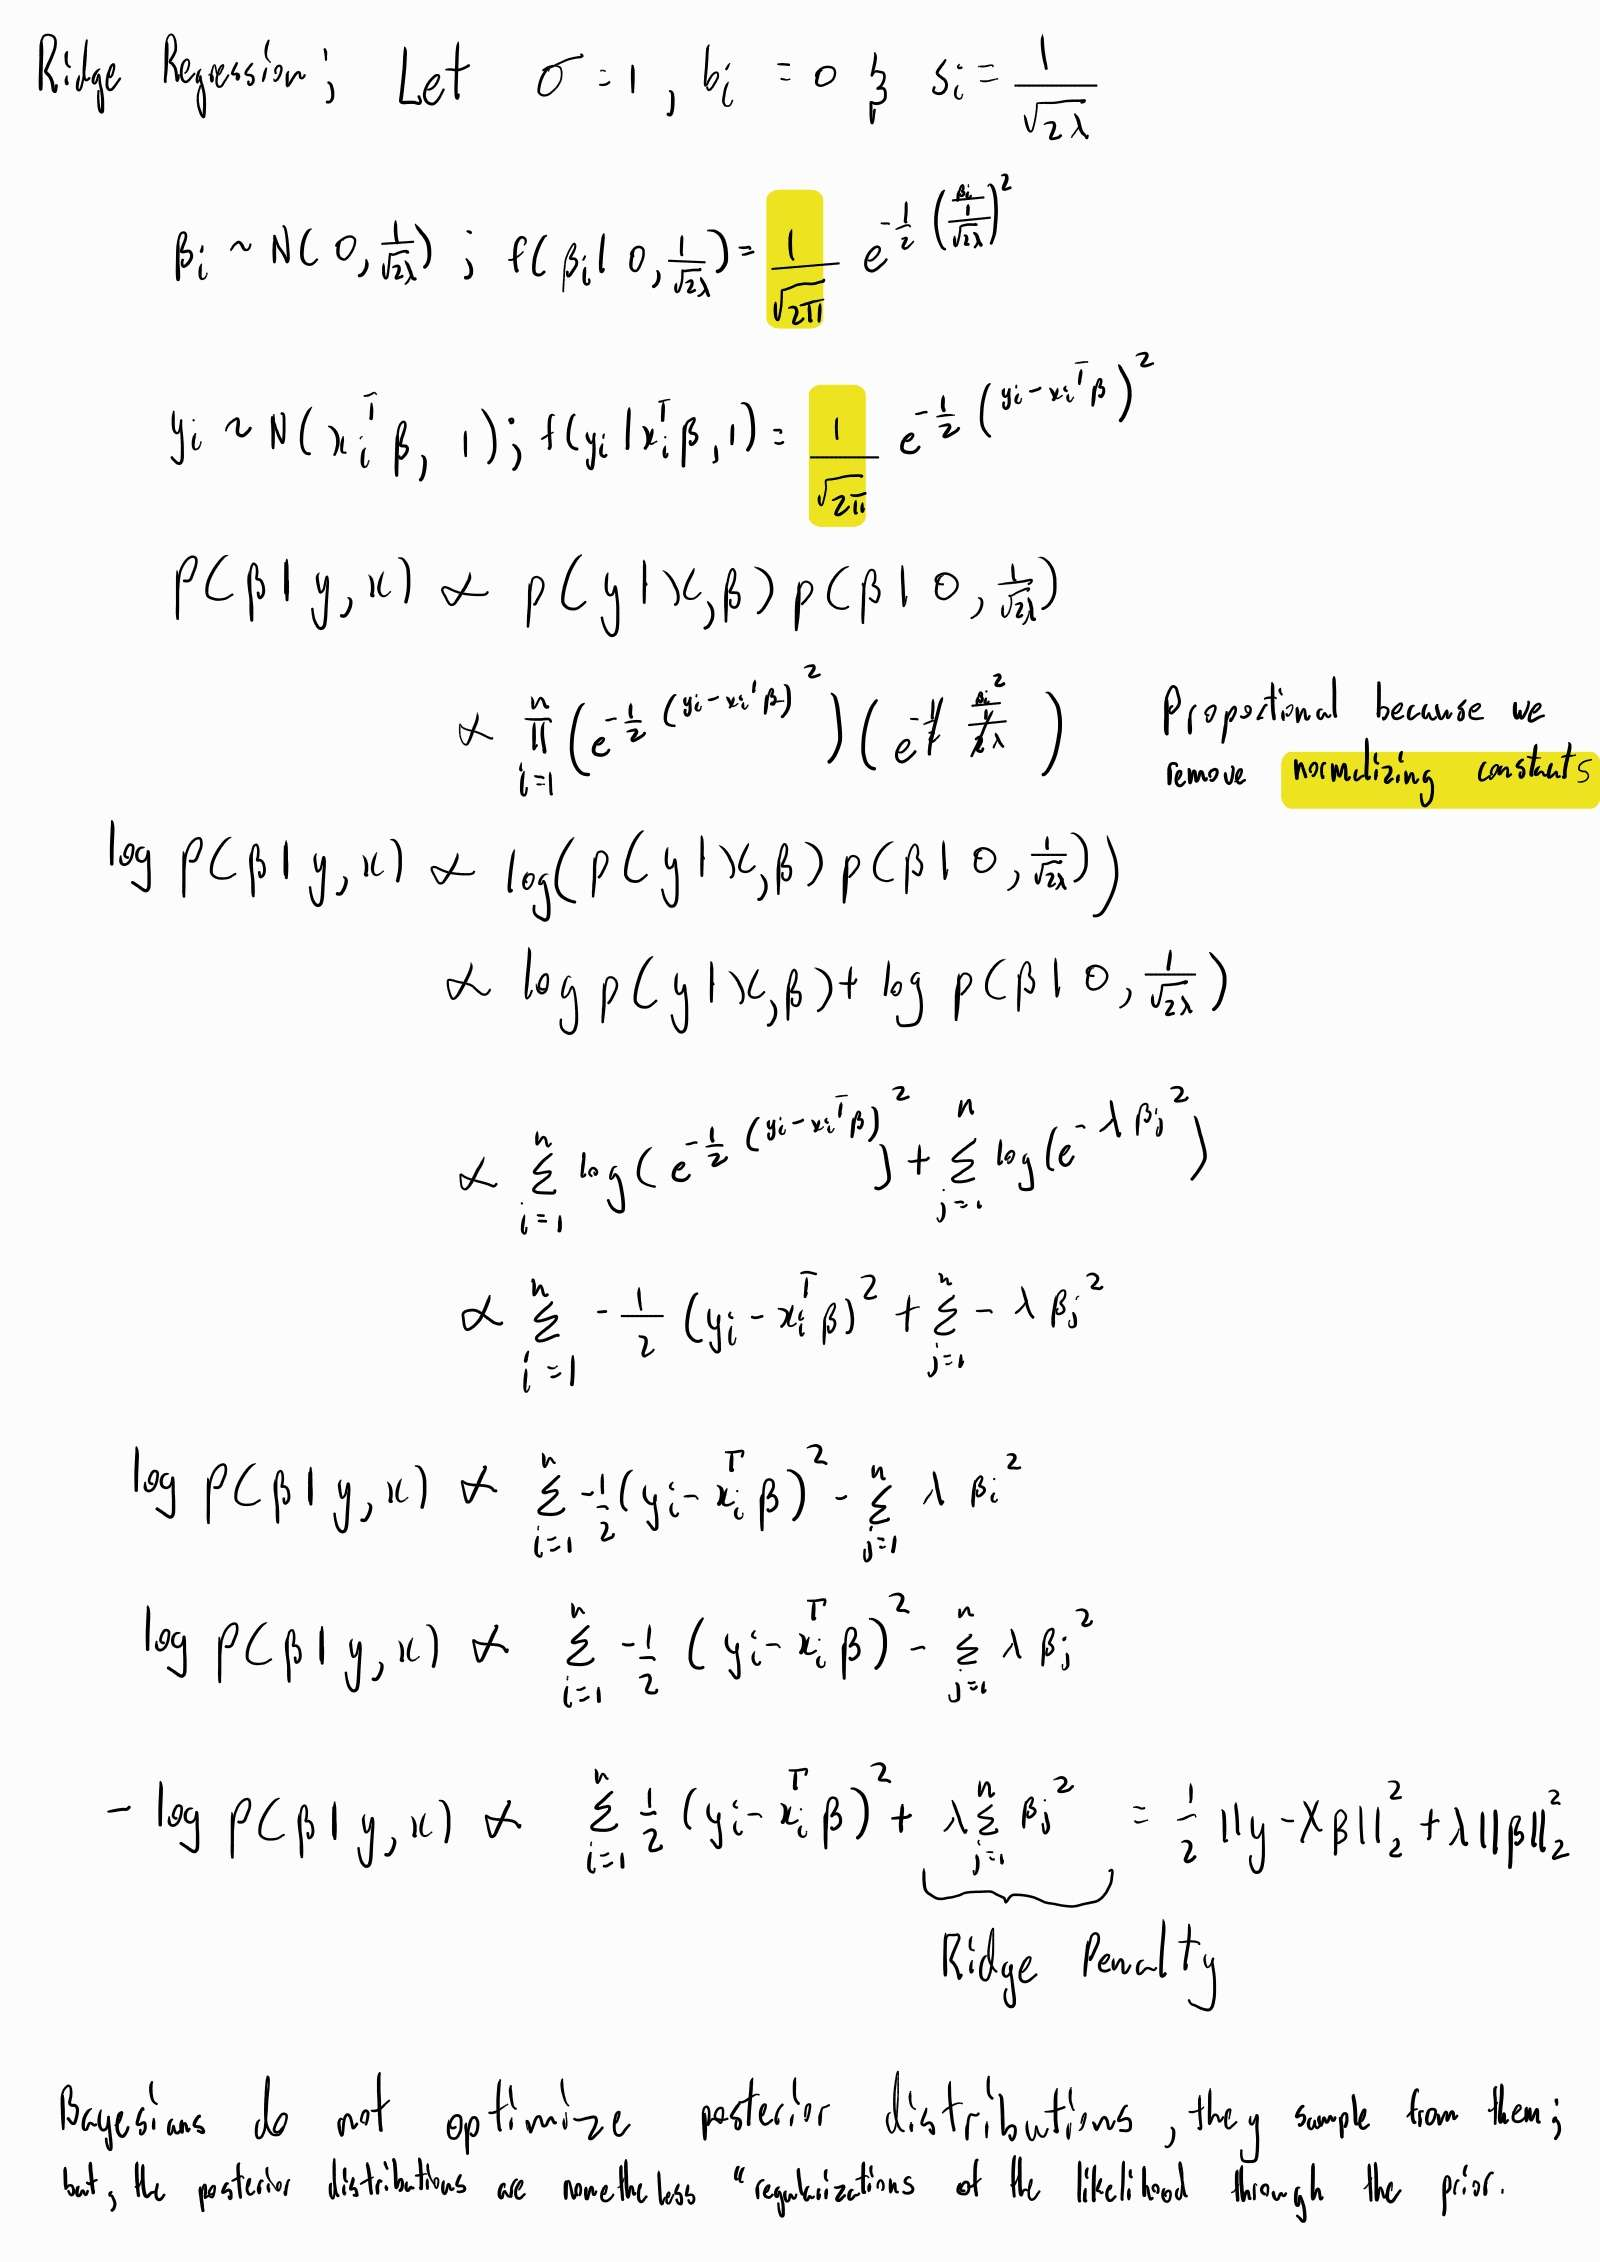